In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
df = pd.read_csv(r"C:\Users\sarad\OneDrive\assml02.csv")
df

,Column1,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [86]:
df_cleaned = df.drop(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', ], axis=1)

# Handling categorical feature "Price"
df_cleaned = pd.get_dummies(df_cleaned, columns=['Price'])
print(df_cleaned.head())


# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)
print(scaled_features)

   Column1  Price_6100  Price_11900  Price_12000  Price_13000  Price_17000  \
0        1           0            0            0            0            0   
1        2           0            0            0            0            0   
2        3           0            0            0            0            0   
3        4           0            0            0            0            0   
4        5           0            0            0            0            0   

   Price_19000  Price_20000  Price_21000  Price_22000  ...  Price_158000  \
0            0            0            0            0  ...             0   
1            0            0            0            0  ...             0   
2            0            0            0            0  ...             0   
3            0            0            0            0  ...             0   
4            0            0            0            0  ...             0   

   Price_160000  Price_168000  Price_170000  Price_180000  Price_185000  \

C:\Users\sarad\Anac py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sarad\Anac py\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sarad\Anac py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sarad\Anac py\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

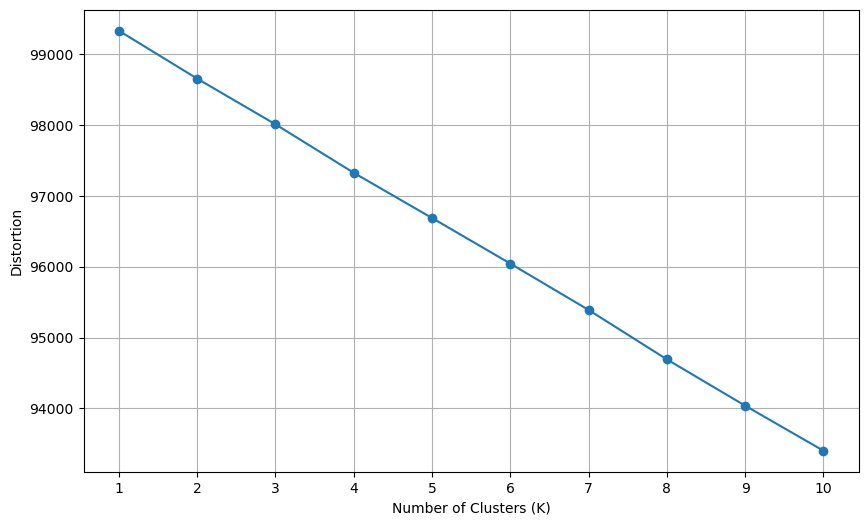

In [91]:
def find_optimal_k(data, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

max_clusters = 10
distortions = find_optimal_k(scaled_features, max_clusters)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.xticks(np.arange(1, max_clusters + 1))
plt.grid(True)
plt.show()

# Based on the plot, let's assume the optimal value of K is 3
optimal_k = 3

In [90]:
numerical_cols = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


def cluster_houses(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[numerical_cols])
    return data

num_clusters = 4

clustered_df = cluster_houses(df, num_clusters)
print(clustered_df.head())

C:\Users\sarad\Anac py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sarad\Anac py\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


   Column1      Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom  \
0        1 -0.456393 -1.014897   -0.772347 -0.828956     0.402694  0.276918   
1        2  0.791798 -0.242042   -0.772347  1.151328     0.402694  0.276918   
2        3 -0.507434 -0.242042   -0.772347 -0.828956     0.402694 -1.187117   
3        4 -0.089824 -1.014897   -0.772347  0.161186     0.402694  0.276918   
4        5 -0.730160  1.303669    0.629803  0.161186     0.402694  0.276918   

      Price  Cluster  
0  0.000370        0  
1  0.449714        0  
2 -0.111966        3  
3 -0.477058        0  
4 -0.477058        2  
